In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Konfigurace vizualizace dat
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
matplotlib.style.use('ggplot')
pd.options.display.max_rows = 15

In [23]:
from IPython.display import clear_output
dataset = "../test/fixtures/kun*.txt"
print('Compiling...')
!cd ..; make dev > /dev/null 2> /dev/null
print('Calculating sequential pass...')
!../bin/pdpjes-seq {dataset} > /tmp/pdpjes-results-seq.csv
print('Calculating parallel pass...')
!../bin/pdpjes {dataset} > /tmp/pdpjes-results-parallel.csv
print('Done.')

Compiling...
Calculating sequential pass...
Calculating file 12/12
Calculating parallel pass...
-!- OpenMP ready. 8 threads available on 8 CPUs. 
Calculating file 12/12
Done.


In [34]:
parallel = pd.read_csv('/tmp/pdpjes-results-parallel.csv')
parallel_star = pd.read_csv('./star-run-01.csv')
sequential = pd.read_csv('/tmp/pdpjes-results-seq.csv')
sequential_star = pd.read_csv('./star-run-02.csv')

In [35]:
iterations = pd.DataFrame({
    '0 Test File': sequential['filename'],
    '1 Parallel': parallel['iterations'],
    '2 Parallel@Star': parallel_star['iterations'],
    '3 Sequential': sequential['iterations'],
    '4 Sequential vs Parallel': sequential['iterations'] - parallel['iterations'],
    '5 Sequential vs Parallel@Star': sequential['iterations'] - parallel_star['iterations'],
    '6 Parallel vs Parallel@Star': parallel['iterations'] - parallel_star['iterations']
})

iterations

,0 Test File,1 Parallel,2 Parallel@Star,3 Sequential,4 Sequential vs Parallel,5 Sequential vs Parallel@Star,6 Parallel vs Parallel@Star
0,../test/fixtures/kun01.txt,42252,15765,30606,-11646,14841,26487
1,../test/fixtures/kun02.txt,25502,19948,19190,-6312,-758,5554
2,../test/fixtures/kun03.txt,504263,1663425,2984057,2479794,1320632,-1159162
3,../test/fixtures/kun04.txt,29464,62895,59563,30099,-3332,-33431
4,../test/fixtures/kun05.txt,475745,28901,59563,-416182,30662,446844
5,../test/fixtures/kun06.txt,11219,24818,34853,23634,10035,-13599
6,../test/fixtures/kun07.txt,38944,28886,19190,-19754,-9696,10058
7,../test/fixtures/kun08.txt,516360,943932,2943943,2427583,2000011,-427572
8,../test/fixtures/kun09.txt,309480,458397,424752,115272,-33645,-148917
9,../test/fixtures/kun10.txt,19406199,11131561,15544085,-3862114,4412524,8274638


## Local

3,4 GHz Intel Core i7, 4-core, 8 threads (hyper-thr)

In [36]:
elapsed = pd.DataFrame({
    '0 Test File': sequential['filename'],
    '1 Parallel': parallel['elapsed'],
    '3 Sequential': sequential['elapsed'],
    '4 Sequential vs Parallel': sequential['elapsed'] - parallel['elapsed'],
})

elapsed

,0 Test File,1 Parallel,3 Sequential,4 Sequential vs Parallel
0,../test/fixtures/kun01.txt,0.010614,0.028218,0.017604
1,../test/fixtures/kun02.txt,0.006578,0.017044,0.010466
2,../test/fixtures/kun03.txt,0.112243,2.601100,2.488857
3,../test/fixtures/kun04.txt,0.006759,0.052444,0.045686
4,../test/fixtures/kun05.txt,0.107471,0.052078,-0.055393
5,../test/fixtures/kun06.txt,0.002675,0.031005,0.028330
6,../test/fixtures/kun07.txt,0.010776,0.019723,0.008948
7,../test/fixtures/kun08.txt,0.116484,2.742440,2.625956
8,../test/fixtures/kun09.txt,0.074875,0.379592,0.304717
9,../test/fixtures/kun10.txt,4.702110,14.022900,9.320790


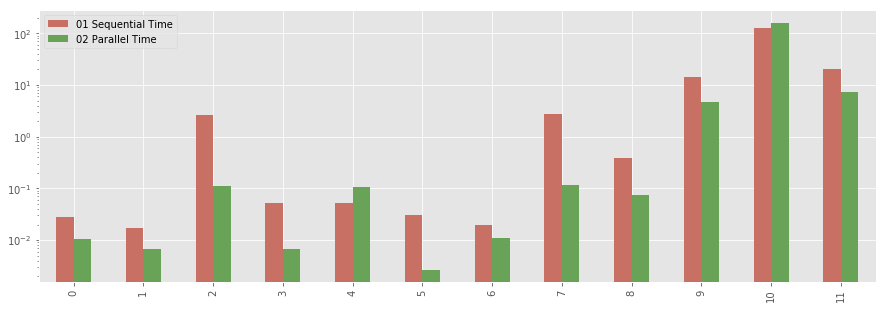

In [49]:
comparison = pd.DataFrame({
    '01 Sequential Time': sequential['elapsed'],
    '02 Parallel Time': parallel['elapsed']
})

ax = comparison.plot(kind='bar', color=['#C97064','#68A357'])
ax.set_yscale('log', nonposy='clip')

## Star

20-core yadda yadda

In [38]:
elapsed_star = pd.DataFrame({
    '0 Test File': sequential_star['filename'],
    '1 Parallel': parallel_star['elapsed'],
    '3 Sequential': sequential_star['elapsed'],
    '4 Sequential vs Parallel': sequential_star['elapsed'] - parallel_star['elapsed'],
})

elapsed_star

,0 Test File,1 Parallel,3 Sequential,4 Sequential vs Parallel
0,./test/fixtures/kun01.txt,0.008276,0.014741,0.006464
1,./test/fixtures/kun02.txt,0.007961,0.008695,0.000735
2,./test/fixtures/kun03.txt,0.560032,0.839563,0.279531
3,./test/fixtures/kun04.txt,0.021440,0.013477,-0.007963
4,./test/fixtures/kun05.txt,0.009171,0.013463,0.004292
5,./test/fixtures/kun06.txt,0.007997,0.008310,0.000313
6,./test/fixtures/kun07.txt,0.009043,0.004502,-0.004542
7,./test/fixtures/kun08.txt,0.238276,0.670087,0.431811
8,./test/fixtures/kun09.txt,0.105193,0.097211,-0.007982
9,./test/fixtures/kun10.txt,3.127940,3.629210,0.501270


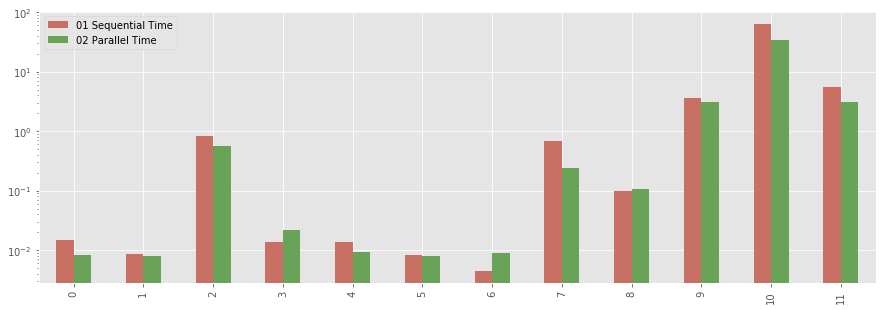

In [50]:
comparison = pd.DataFrame({
    '01 Sequential Time': sequential_star['elapsed'],
    '02 Parallel Time': parallel_star['elapsed']
})

ax = comparison.plot(kind='bar', color=['#C97064','#68A357'])
ax.set_yscale('log', nonposy='clip')

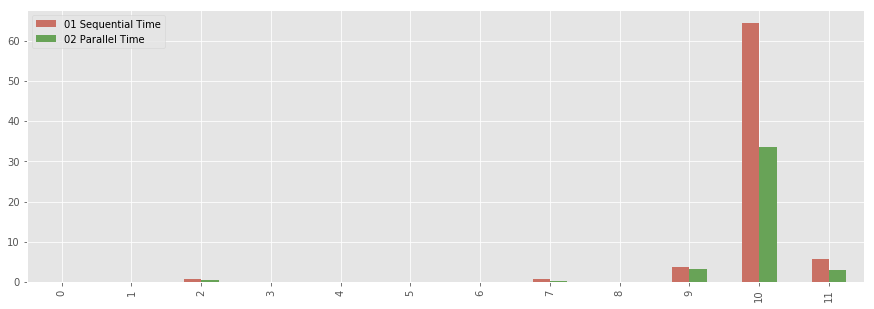

In [51]:
ax = comparison.plot(kind='bar', color=['#C97064','#68A357'])

## Max size experimentation

In [22]:
par_sizes = pd.read_csv('./star-run-sizes.csv')

par_sizes[['filename', 'max_size', 'elapsed']]

,filename,max_size,elapsed
0,./test/fixtures/kun10.txt,2,3.85084
1,./test/fixtures/kun10.txt,3,3.68154
2,./test/fixtures/kun10.txt,4,2.06274
3,./test/fixtures/kun10.txt,5,2.59981
4,./test/fixtures/kun10.txt,6,1.10867
5,./test/fixtures/kun10.txt,7,4.01406
6,./test/fixtures/kun10.txt,8,3.50664
7,./test/fixtures/kun10.txt,12,6.80894


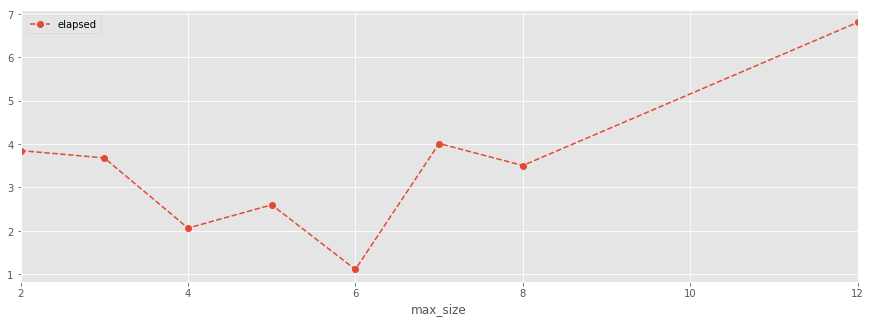

In [25]:
par_sizes_line = par_sizes.copy()
par_sizes_line = par_sizes_line.set_index('max_size')
par_sizes_line[['elapsed']].plot(marker = 'o', ls = '--')

In [40]:
#!rm /tmp/pdpjes*